In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [2]:
df = pd.read_csv('data/tmdb_movies.csv')

In [3]:
movies = df.drop(['homepage','tagline'],axis=1).dropna()
movies['release_date'] = pd.to_datetime(movies['release_date'],format='%Y-%m-%d')
movies['year'] = movies.release_date.dt.year

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 19 columns):
budget                  4799 non-null int64
genres                  4799 non-null object
id                      4799 non-null int64
keywords                4799 non-null object
original_language       4799 non-null object
original_title          4799 non-null object
overview                4799 non-null object
popularity              4799 non-null float64
production_companies    4799 non-null object
production_countries    4799 non-null object
release_date            4799 non-null datetime64[ns]
revenue                 4799 non-null int64
runtime                 4799 non-null float64
spoken_languages        4799 non-null object
status                  4799 non-null object
title                   4799 non-null object
vote_average            4799 non-null float64
vote_count              4799 non-null int64
year                    4799 non-null int64
dtypes: datetime64[ns](1), float

In [51]:
new = movies[(movies.year>1950) & (movies.year<2017)]
new['std_rev'] = (new.revenue-np.mean(new.revenue))/np.std(new.revenue)
newer = new[(new.std_rev<=0.5) & (new.std_rev>=-0.5)]

(1950, 2016)

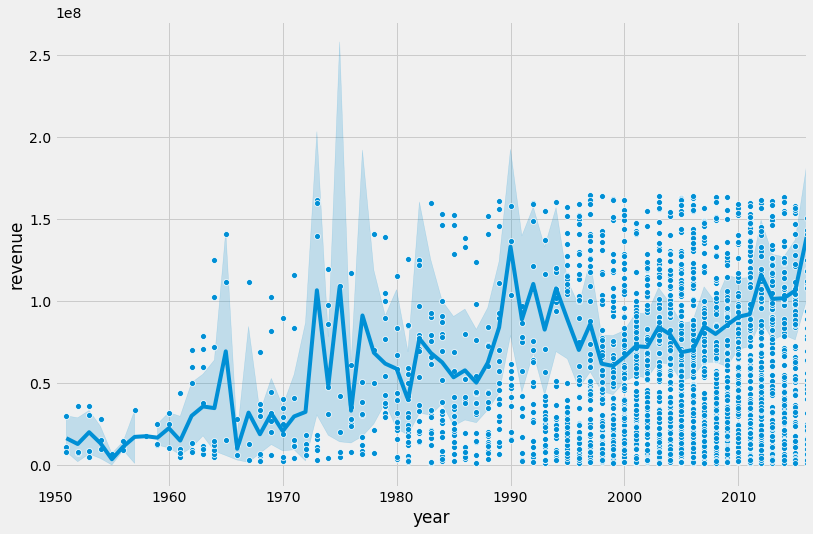

In [52]:
sns.lineplot(new.year,new.revenue)
sns.scatterplot(newer.year,newer.revenue)
plt.xlim(1950,2016)